In [61]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [62]:
wear_file_path = r'/home/eugenekalentev/Documents/DataScience/Prediction_wear/mass_wear_data.csv'

wear_data = pd.read_csv(wear_file_path)

wear_data.describe(include='all')

,ID,Rotation_frequency,Type_of_abrasive,Material,Wear
count,42.000000,42.000000,42,42,39.000000
unique,NaN,NaN,3,2,NaN
top,NaN,NaN,K120,Cu,NaN
freq,NaN,NaN,14,21,NaN
mean,21.500000,13.785714,NaN,NaN,13.076154
std,12.267844,13.245405,NaN,NaN,2.321623
min,1.000000,4.000000,NaN,NaN,8.960000
25%,11.250000,5.000000,NaN,NaN,11.150000
50%,21.500000,10.000000,NaN,NaN,13.500000
75%,31.750000,15.000000,NaN,NaN,14.550000


In [63]:
wear_data.head()

,ID,Rotation_frequency,Type_of_abrasive,Material,Wear
0,1,4,K80,Cu,16.2
1,2,4,K80,Al,12.5
2,3,4,K120,Cu,14.8
3,4,4,K120,Al,11.2
4,5,4,K180,Cu,12.9


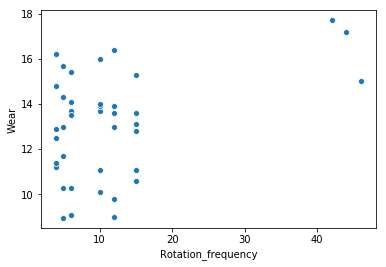

In [64]:
sns.scatterplot(x=wear_data['Rotation_frequency'], y=wear_data['Wear'])

In [65]:
wear_data.isnull().sum()

ID                    0
Rotation_frequency    0
Type_of_abrasive      0
Material              0
Wear                  3
dtype: int64

In [66]:
wear_data = wear_data.dropna(axis=0)

In [67]:
#Type_of_abrasive
le = LabelEncoder()
le.fit(wear_data.Type_of_abrasive.drop_duplicates()) 
wear_data.Type_of_abrasive = le.transform(wear_data.Type_of_abrasive)
# Material
le.fit(wear_data.Material.drop_duplicates()) 
wear_data.Material = le.transform(wear_data.Material)


In [68]:
wear_data.corr()['Wear'].sort_values()

ID                    0.100296
Type_of_abrasive      0.372734
Rotation_frequency    0.407712
Material              0.754140
Wear                  1.000000
Name: Wear, dtype: float64

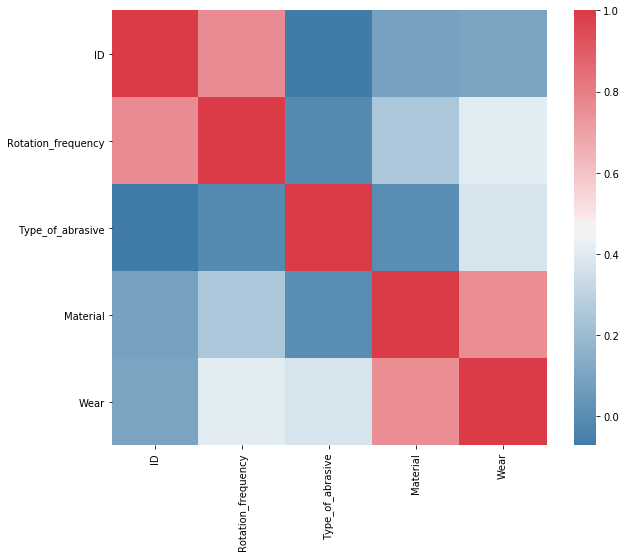

In [69]:
f, ax = plt.subplots(figsize=(10, 8))
corr = wear_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [70]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
p = figure(title="Distribution of charges",tools="save",
            background_fill_color="#E8DDCB")
hist, edges = np.histogram(wear_data.Wear)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'
show(gridplot(p,ncols = 2, plot_width=400, plot_height=400, toolbar_location=None))

Loading BokehJS ...

TypeError: 'Figure' object is not iterable

In [75]:
wear_data

,ID,Rotation_frequency,Type_of_abrasive,Material,Wear
0,1,4,2,1,16.20
1,2,4,2,0,12.50
2,3,4,0,1,14.80
3,4,4,0,0,11.20
4,5,4,1,1,12.90
5,6,4,1,0,11.40
6,7,5,2,1,15.70
7,8,5,2,0,11.70
8,9,5,0,1,14.30
9,10,5,0,0,10.30


Text(0.5, 1.0, 'Distribution of wear for Material=1')

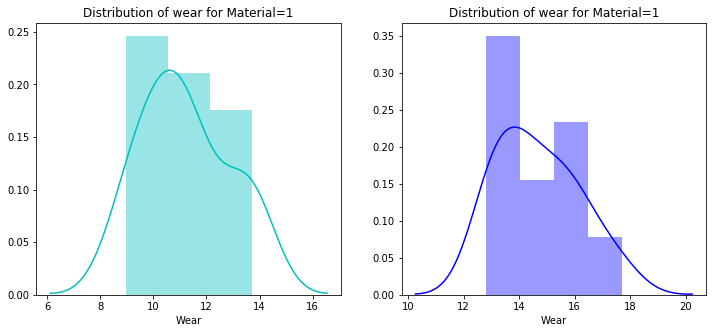

In [77]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(wear_data[(wear_data.Material == 0)]["Wear"],color='c',ax=ax)
ax.set_title('Distribution of wear for Material=1')

ax=f.add_subplot(122)
sns.distplot(wear_data[(wear_data.Material == 1)]["Wear"],color='b',ax=ax)
ax.set_title('Distribution of wear for Material=1')